<a href="https://colab.research.google.com/github/Chandra0718/Data-Analytics/blob/main/Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import files
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv


In [7]:
# -------------------------------
# STEP 1: Import Libraries
# -------------------------------
import pandas as pd

# -------------------------------
# STEP 2: Load the Datasets
# -------------------------------
# Replace the file path with your own if different
matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")

# Preview first few rows
print("Matches Dataset:")
print(matches.head())
print("\nDeliveries Dataset:")
print(deliveries.head())

# -------------------------------
# STEP 3: Data Cleaning
# -------------------------------

# 1. Drop unnecessary column from matches dataset
matches.drop(columns=["umpire3"], inplace=True)

# 2. Fill missing values in matches dataset
matches["city"].fillna("Unknown", inplace=True)
matches["winner"].fillna("Unknown", inplace=True)
matches["player_of_match"].fillna("Unknown", inplace=True)
matches["umpire1"].fillna("Unknown", inplace=True)
matches["umpire2"].fillna("Unknown", inplace=True)

# 3. Remove duplicate rows in deliveries dataset (if any)
deliveries.drop_duplicates(inplace=True)

# -------------------------------
# STEP 4: Check Cleaned Data
# -------------------------------
print("\n✅ Matches dataset after cleaning:")
print(matches.info())
print("\n✅ Deliveries dataset after cleaning:")
print(deliveries.info())

Matches Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrise

/tmp/ipython-input-595482421.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches["city"].fillna("Unknown", inplace=True)
/tmp/ipython-input-595482421.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Top Teams by Wins:
 winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Name: count, dtype: int64


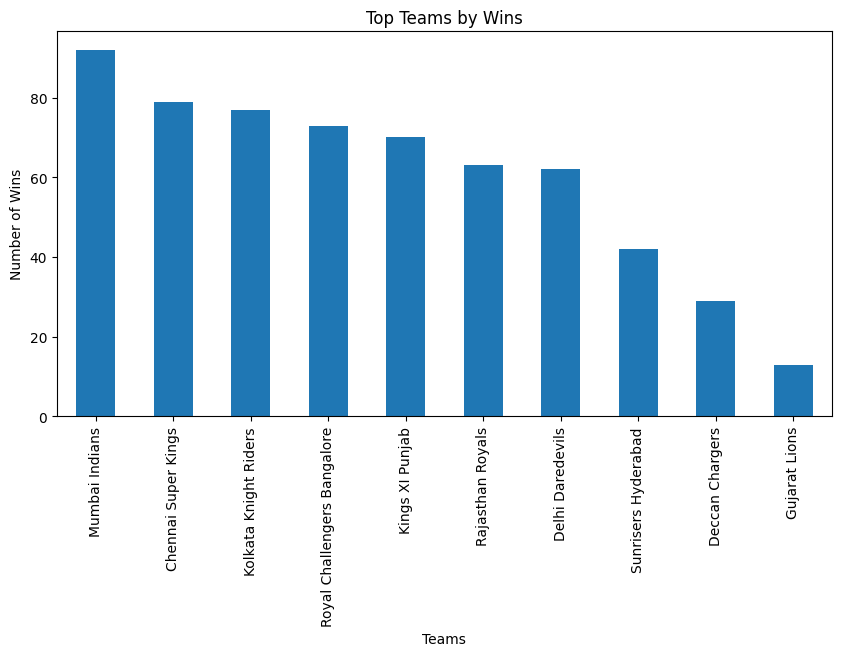


Top Players of the Match:
 player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
RG Sharma         14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: count, dtype: int64


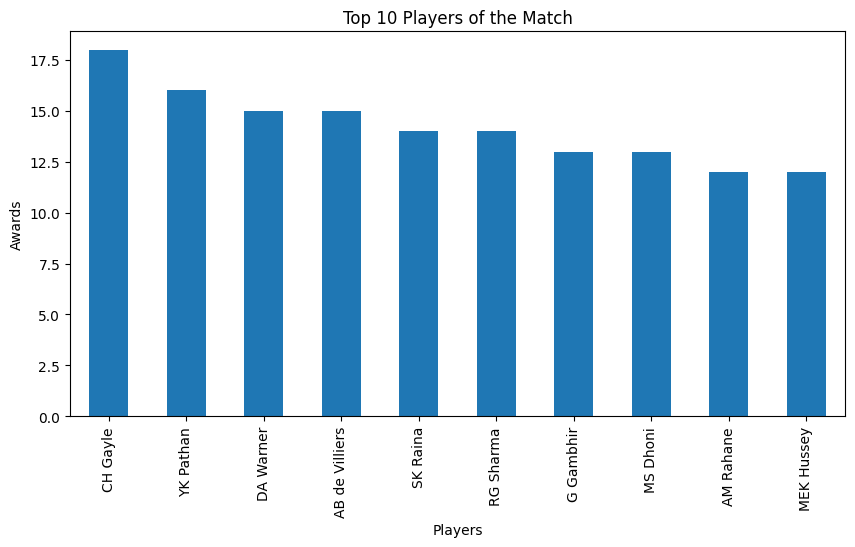

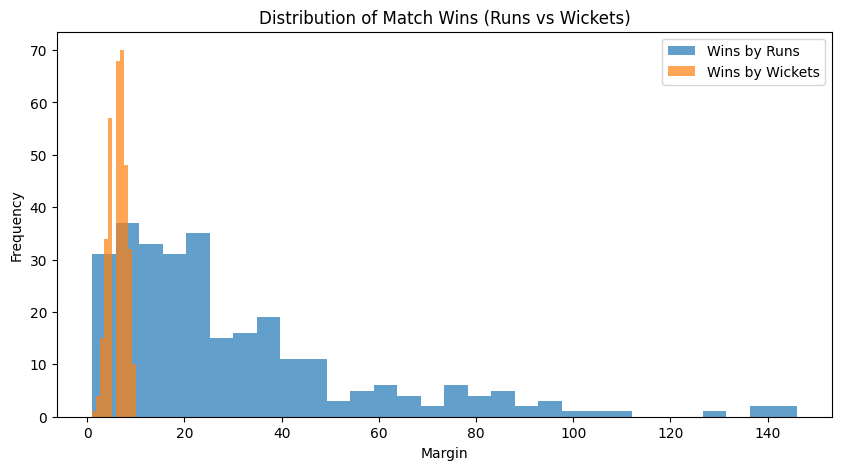

In [8]:
# -------------------------------
# STEP 3: Exploratory Data Analysis (EDA)
# -------------------------------

import matplotlib.pyplot as plt

# 1. Most successful teams
team_wins = matches['winner'].value_counts().head(10)
print("Top Teams by Wins:\n", team_wins)

team_wins.plot(kind='bar', figsize=(10,5), title="Top Teams by Wins")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.show()

# 2. Top players of the match
top_players = matches['player_of_match'].value_counts().head(10)
print("\nTop Players of the Match:\n", top_players)

top_players.plot(kind='bar', figsize=(10,5), title="Top 10 Players of the Match")
plt.xlabel("Players")
plt.ylabel("Awards")
plt.show()

# 3. Win by Runs vs Wickets
plt.figure(figsize=(10,5))
plt.hist(matches['win_by_runs'][matches['win_by_runs']>0], bins=30, alpha=0.7, label='Wins by Runs')
plt.hist(matches['win_by_wickets'][matches['win_by_wickets']>0], bins=11, alpha=0.7, label='Wins by Wickets')
plt.legend()
plt.title("Distribution of Match Wins (Runs vs Wickets)")
plt.xlabel("Margin")
plt.ylabel("Frequency")
plt.show()

Top 10 Run Scorers:
 batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64


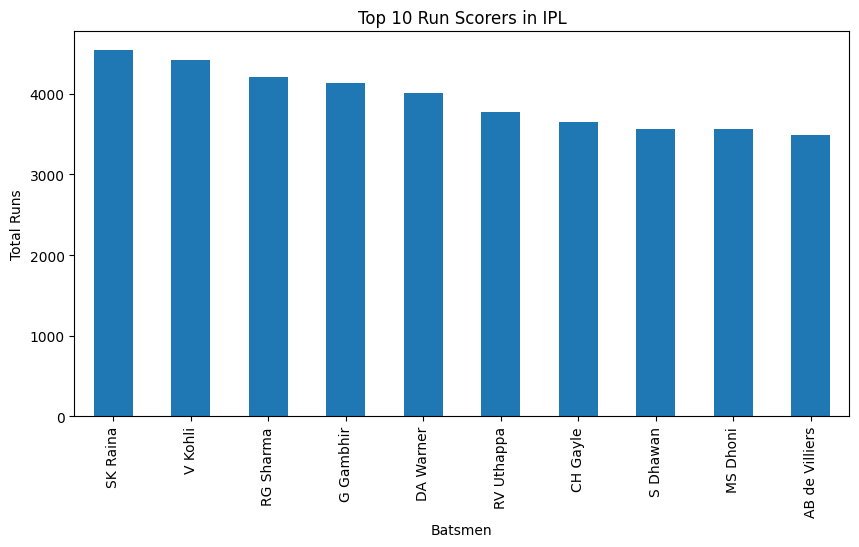


Top 10 Wicket Takers:
 bowler
SL Malinga         170
A Mishra           142
DJ Bravo           137
Harbhajan Singh    136
PP Chawla          133
R Vinay Kumar      125
A Nehra            121
Z Khan             119
B Kumar            117
R Ashwin           110
Name: player_dismissed, dtype: int64


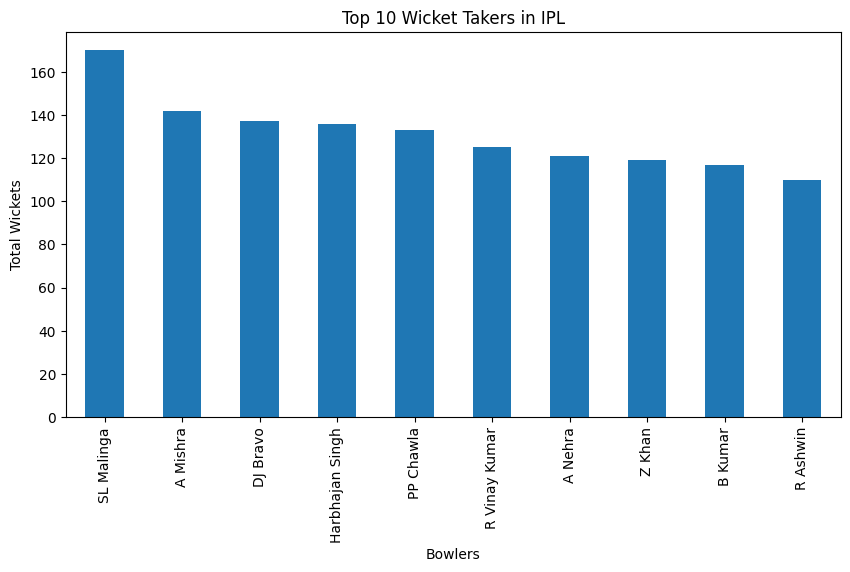


Batsman vs Bowler Analysis: V Kohli vs SL Malinga
Total Runs Scored: 25
Balls Faced: 29
Times Dismissed: 0


In [9]:
# -------------------------------
# STEP 4: Batsman Performance
# -------------------------------

# Top 10 run scorers
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 Run Scorers:\n", top_batsmen)

top_batsmen.plot(kind='bar', figsize=(10,5), title="Top 10 Run Scorers in IPL")
plt.xlabel("Batsmen")
plt.ylabel("Total Runs")
plt.show()

# -------------------------------
# STEP 5: Bowler Performance
# -------------------------------

# Wickets taken (player_dismissed not null)
wickets = deliveries[deliveries['player_dismissed'].notnull()]
top_bowlers = wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Wicket Takers:\n", top_bowlers)

top_bowlers.plot(kind='bar', figsize=(10,5), title="Top 10 Wicket Takers in IPL")
plt.xlabel("Bowlers")
plt.ylabel("Total Wickets")
plt.show()

# -------------------------------
# STEP 6: Batsman vs Bowler Matchup
# -------------------------------

# Example: Virat Kohli vs Lasith Malinga
batsman = "V Kohli"
bowler = "SL Malinga"

matchup = deliveries[(deliveries['batsman'] == batsman) & (deliveries['bowler'] == bowler)]
runs = matchup['batsman_runs'].sum()
balls = matchup.shape[0]
dismissals = matchup['player_dismissed'].count()

print(f"\nBatsman vs Bowler Analysis: {batsman} vs {bowler}")
print(f"Total Runs Scored: {runs}")
print(f"Balls Faced: {balls}")
print(f"Times Dismissed: {dismissals}")

✅ Combined dataset shape: (150459, 38)
Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind']

Total Runs by Season:
 season
2008    17937
2009    16353
2010    18882
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
Name: total_runs, dtype: int64


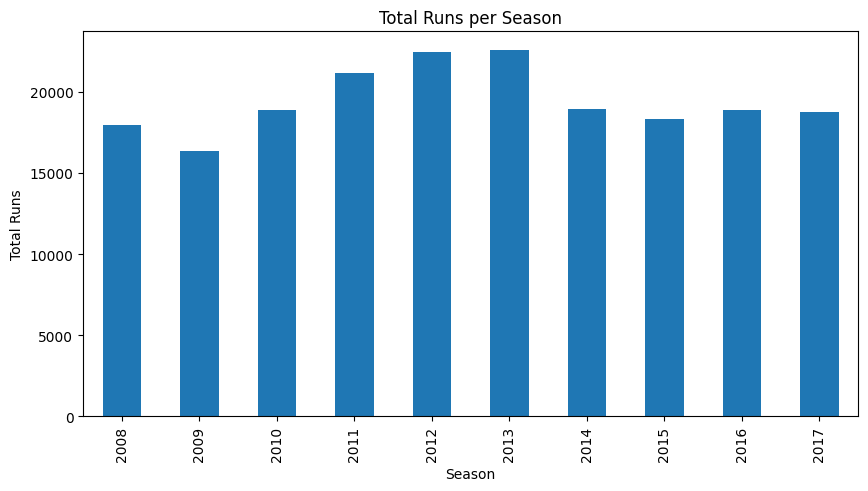


Total Runs by Team:
 batting_team
Mumbai Indians                 24520
Royal Challengers Bangalore    23436
Kings XI Punjab                23068
Kolkata Knight Riders          21965
Delhi Daredevils               21953
Chennai Super Kings            20899
Rajasthan Royals               17703
Sunrisers Hyderabad            11652
Deccan Chargers                11463
Pune Warriors                   6358
Gujarat Lions                   4862
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64


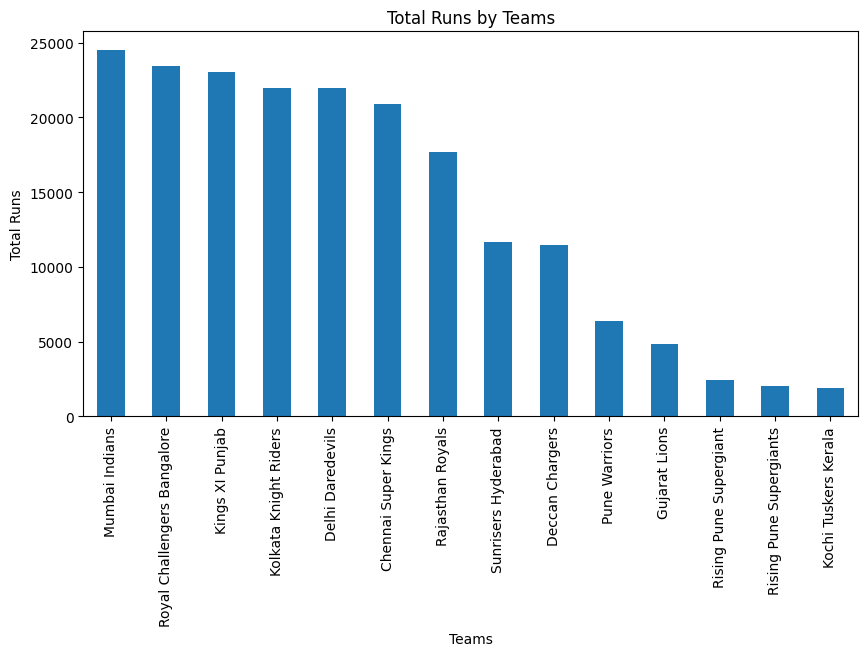


Matches Won by Teams per Season:
 winner  Chennai Super Kings  Deccan Chargers  Delhi Daredevils  Gujarat Lions  \
season                                                                          
2008                    9.0              2.0               7.0            0.0   
2009                    8.0              9.0              10.0            0.0   
2010                    9.0              8.0               7.0            0.0   
2011                   11.0              6.0               4.0            0.0   
2012                   10.0              4.0              11.0            0.0   
2013                   12.0              0.0               3.0            0.0   
2014                   10.0              0.0               2.0            0.0   
2015                   10.0              0.0               5.0            0.0   
2016                    0.0              0.0               7.0            9.0   
2017                    0.0              0.0               6.0            

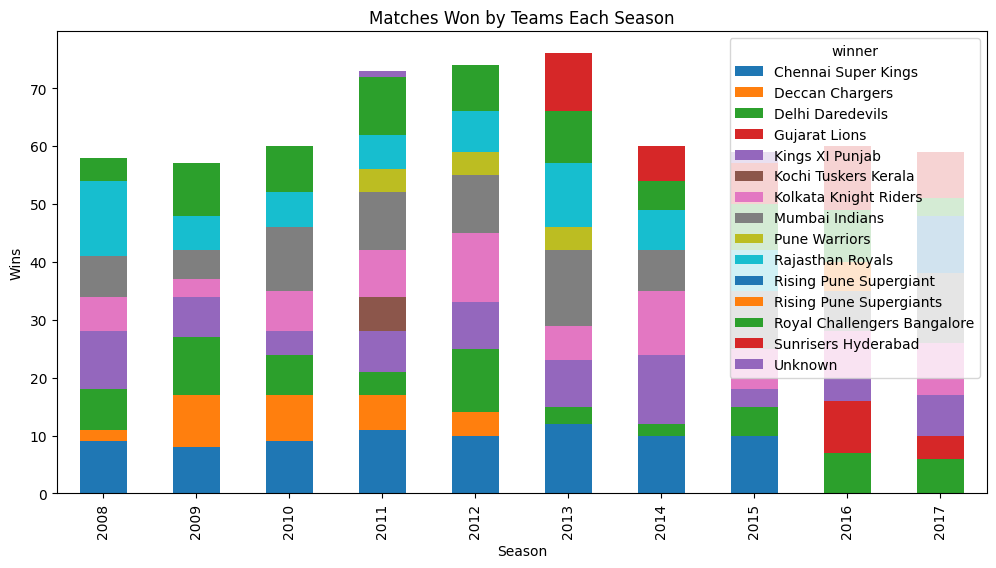

In [10]:
# -------------------------------
# STEP 7: Merge Matches and Deliveries
# -------------------------------

# Merge deliveries with matches on match_id
combined = deliveries.merge(matches, left_on='match_id', right_on='id')

print("✅ Combined dataset shape:", combined.shape)
print("Columns:", combined.columns.tolist()[:20])  # show first 20 columns

# -------------------------------
# STEP 8: Season-wise Runs
# -------------------------------
season_runs = combined.groupby('season')['total_runs'].sum()
print("\nTotal Runs by Season:\n", season_runs)

season_runs.plot(kind='bar', figsize=(10,5), title="Total Runs per Season")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.show()

# -------------------------------
# STEP 9: Team-wise Runs
# -------------------------------
team_runs = combined.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print("\nTotal Runs by Team:\n", team_runs)

team_runs.plot(kind='bar', figsize=(10,5), title="Total Runs by Teams")
plt.xlabel("Teams")
plt.ylabel("Total Runs")
plt.show()

# -------------------------------
# STEP 10: Season-wise Winners
# -------------------------------
winners_per_season = matches.groupby('season')['winner'].value_counts().unstack().fillna(0)
print("\nMatches Won by Teams per Season:\n", winners_per_season)

winners_per_season.plot(kind='bar', stacked=True, figsize=(12,6), title="Matches Won by Teams Each Season")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.show()

In [11]:
# -------------------------------
# STEP 11: Insights & Export
# -------------------------------

# 1. Key Insights (print summary)
print("📊 Key Insights from IPL Data Analysis")
print("- Most successful teams overall:", matches['winner'].value_counts().idxmax())
print("- Most 'Player of the Match' awards:", matches['player_of_match'].value_counts().idxmax())
print("- Highest run scorer:", deliveries.groupby('batsman')['batsman_runs'].sum().idxmax())
print("- Highest wicket taker:", deliveries[deliveries['player_dismissed'].notnull()]
                                     .groupby('bowler')['player_dismissed']
                                     .count().idxmax())

# 2. Save cleaned datasets
matches.to_csv("matches_cleaned.csv", index=False)
deliveries.to_csv("deliveries_cleaned.csv", index=False)
combined.to_csv("combined_dataset.csv", index=False)

print("\n✅ Cleaned datasets saved as:")
print("- matches_cleaned.csv")
print("- deliveries_cleaned.csv")
print("- combined_dataset.csv")

# 3. Export plots (example: top teams by wins)
import matplotlib.pyplot as plt

team_wins = matches['winner'].value_counts().head(10)
ax = team_wins.plot(kind='bar', figsize=(8,5), title="Top Teams by Wins")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.tight_layout()
plt.savefig("top_teams_by_wins.png")   # Save plot
plt.close()

print("✅ Example plot saved: top_teams_by_wins.png")

# 4. Download files back to your system
from google.colab import files
files.download("matches_cleaned.csv")
files.download("deliveries_cleaned.csv")
files.download("combined_dataset.csv")
files.download("top_teams_by_wins.png")

📊 Key Insights from IPL Data Analysis
- Most successful teams overall: Mumbai Indians
- Most 'Player of the Match' awards: CH Gayle
- Highest run scorer: SK Raina
- Highest wicket taker: SL Malinga

✅ Cleaned datasets saved as:
- matches_cleaned.csv
- deliveries_cleaned.csv
- combined_dataset.csv
✅ Example plot saved: top_teams_by_wins.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Load Data
# -------------------------------
matches = pd.read_csv("matches_cleaned.csv")
deliveries = pd.read_csv("deliveries_cleaned.csv")

# -------------------------------
# Sidebar Navigation
# -------------------------------
st.sidebar.title("🏏 IPL Dashboard")
page = st.sidebar.radio("Navigate", ["Season Analysis", "Team Analysis", "Player Analysis"])

# -------------------------------
# Page 1: Season Analysis
# -------------------------------
if page == "Season Analysis":
    st.title("📊 IPL Season Analysis")
    season = st.sidebar.selectbox("Select Season", sorted(matches['season'].unique()))

    season_data = matches[matches['season'] == season]
    st.subheader(f"Summary for Season {season}")
    st.write("✅ Total Matches:", season_data.shape[0])
    st.write("🏆 Champion Team:", season_data['winner'].value_counts().idxmax())

    # Team Wins
    st.subheader("🏆 Matches Won by Teams")
    wins = season_data['winner'].value_counts()
    fig, ax = plt.subplots()
    wins.plot(kind='bar', ax=ax, color="skyblue")
    plt.xticks(rotation=45)
    st.pyplot(fig)

    # Player of the Match Awards
    st.subheader("⭐ Top 5 Players of the Match")
    pom = season_data['player_of_match'].value_counts().head(5)
    fig2, ax2 = plt.subplots()
    pom.plot(kind='bar', ax=ax2, color="orange")
    plt.xticks(rotation=45)
    st.pyplot(fig2)

# -------------------------------
# Page 2: Team Analysis
# -------------------------------
elif page == "Team Analysis":
    st.title("🏏 Team Performance Analysis")
    team = st.sidebar.selectbox("Select Team", sorted(matches['team1'].unique()))

    team_matches = matches[(matches['team1'] == team) | (matches['team2'] == team)]
    st.subheader(f"📊 {team} - Match Summary")
    st.write("✅ Total Matches Played:", team_matches.shape[0])
    st.write("🏆 Matches Won:", (team_matches['winner'] == team).sum())

    # Season-wise performance
    st.subheader(f"📈 {team} Wins by Season")
    team_wins = team_matches[team_matches['winner'] == team].groupby('season').size()
    fig3, ax3 = plt.subplots()
    team_wins.plot(kind='bar', ax=ax3, color="green")
    plt.xticks(rotation=45)
    st.pyplot(fig3)

# -------------------------------
# Page 3: Player Analysis
# -------------------------------
elif page == "Player Analysis":
    st.title("👨‍💻 Player Performance Analysis")
    player = st.sidebar.text_input("Enter Player Name (e.g., Virat Kohli)")

    if player:
        player_balls = deliveries[deliveries['batsman'] == player]
        if not player_balls.empty:
            st.subheader(f"📊 Batting Performance of {player}")
            st.write("✅ Total Runs:", player_balls['batsman_runs'].sum())
            st.write("⚡ Total Balls Faced:", player_balls.shape[0])
            st.write("🏏 Strike Rate:", round(player_balls['batsman_runs'].sum() / player_balls.shape[0] * 100, 2))

            # Runs per season
            runs_per_season = player_balls.merge(matches[['id','season']], left_on='match_id', right_on='id')
            runs_season = runs_per_season.groupby('season')['batsman_runs'].sum()
            fig4, ax4 = plt.subplots()
            runs_season.plot(kind='line', marker='o', ax=ax4, color="red")
            plt.xticks(rotation=45)
            st.pyplot(fig4)
        else:
            st.warning("Player not found in dataset.")

Writing app.py


In [19]:
!pip install pyngrok streamlit

from pyngrok import ngrok

# 🔑 Add your ngrok auth token (replace with yours from https://dashboard.ngrok.com/get-started/your-authtoken)
!ngrok config add-authtoken 31TBufvMDJP1W2cMYP0lycUM4cR_4PpsWb2NwAjzirw2eyEQS

# 🛑 Kill old tunnels if any
ngrok.kill()

# ▶ Run your Streamlit app (make sure app.py is in your Colab files)
!streamlit run app.py --server.port 8501 &>/dev/null&

# 🌍 Create ngrok tunnel on the same port (8501)
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app URL: NgrokTunnel: "https://f01aa7e7fcbf.ngrok-free.app" -> "http://localhost:8501"
